[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7102 entries, 0 to 7101
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         7102 non-null   int64 
 1   sentiment  7102 non-null   object
 2   content    7102 non-null   object
dtypes: int64(1), object(2)
memory usage: 166.6+ KB

First 5 Rows:
      ID sentiment                                            content
0  10941     anger  At the point today where if someone says somet...
1  10942     anger  @CorningFootball  IT'S GAME DAY!!!!      T MIN...
2  10943     anger  This game has pissed me off more than any othe...
3  10944     anger  @spamvicious I've just found out it's Candice ...
4  10945     anger  @moocowward @mrsajhargreaves @Melly77 @GaryBar...

Emotion Distribution:
sentiment
fear       2252
anger      1701
joy        1616
sadness    1533
Name: count, dtype: int64


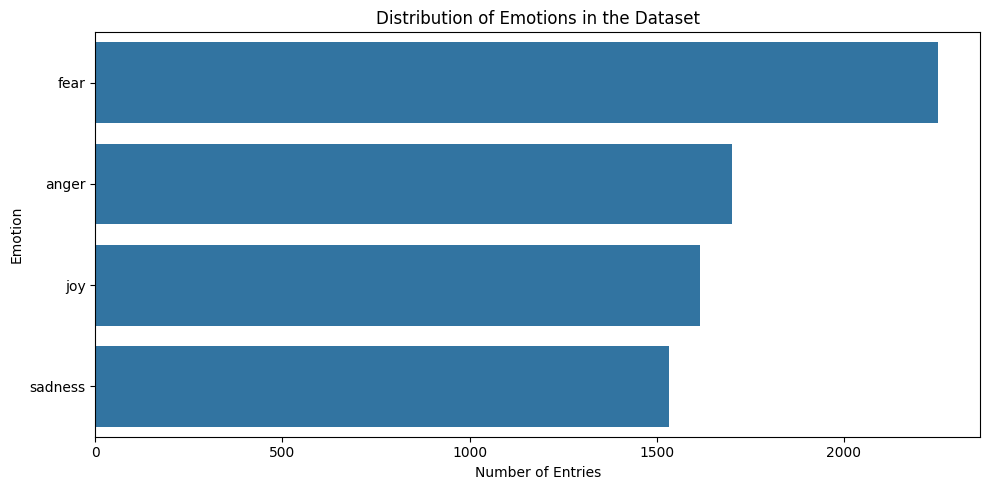


Missing Values:
ID           0
sentiment    0
content      0
dtype: int64

Dataset shape after handling missing values: (7102, 3)


In [7]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Load the Dataset
try:
    df = pd.read_csv('eng_dataset.csv')
except FileNotFoundError:
    print("Error: Dataset not found. Using dummy data.")
    df = pd.DataFrame({
        'text': ["Feeling great today!", "This is making me so angry.", "I'm not sure how I feel.", "A bit down this morning."],
        'emotion': ['joy', 'anger', 'neutral', 'sadness']
    })
except Exception as e:
    print(f"Error loading CSV: {e}")
    df = pd.DataFrame({
        'text': ["Feeling great today!", "This is making me so angry.", "I'm not sure how I feel.", "A bit down this morning."],
        'emotion': ['joy', 'anger', 'neutral', 'sadness']
    })

#Explore the Data
print("Dataset Info:")
df.info() # Shows column types, non-null counts

print("\nFirst 5 Rows:")
print(df.head())

print("\nEmotion Distribution:")
print(df['sentiment'].value_counts())

#Visualize Emotion Distribution
plt.figure(figsize=(10, 5))
sns.countplot(data=df, y='sentiment', order = df['sentiment'].value_counts().index) # Use y='emotion' for horizontal bars if many labels
plt.title('Distribution of Emotions in the Dataset')
plt.xlabel('Number of Entries')
plt.ylabel('Emotion')
plt.tight_layout()
plt.show()

#Check for Missing Values
print("\nMissing Values:")
print(df.isnull().sum())

#Handle Missing Values
#Drop rows with missing text or emotion (simplest)
df.dropna(subset=['content', 'sentiment'], inplace=True)

#Fill missing text (less common, usually drop)
#df['text'].fillna("Unknown", inplace=True)

print("\nDataset shape after handling missing values:", df.shape)


In [8]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('punkt_tab')

try:
    stopwords.words('english')
    word_tokenize('test sentence')
except LookupError:
    print("NLTK data not found. Downloading...")
    nltk.download('punkt', quiet=True)
    nltk.download('stopwords', quiet=True)
    nltk.download('wordnet', quiet=True)
    print("NLTK data downloaded.")


# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Get English stopwords
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    """Cleans and preprocesses text data."""
    if not isinstance(text, str):
        text = str(text)

    # 1. Lowercasing
    text = text.lower()

    # 2. Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # 3. Remove mentions and hashtags (data comes from Twitter)

    text = re.sub(r'\@\w+|\#','', text)

    # 4. Remove punctuation and numbers
    text = re.sub(r'[^a-z\s]', '', text) #only letters and spaces

    # 5. Tokenization (Split text into words)
    tokens = word_tokenize(text)

    # 6. Remove stopwords and lemmatize
    processed_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and len(word) > 1] # Keeping words longer than 1 char

    return " ".join(processed_tokens) # Join back into a string


if 'content' in df.columns: # MODIFIED: Check for 'content' column
    print("\nStarting text preprocessing...")

    # Use .copy() to avoid SettingWithCopyWarning
    df_processed = df.copy()

    # MODIFIED: Apply preprocessing to 'content' and store in 'processed_text'
    df_processed['processed_text'] = df_processed['content'].apply(preprocess_text)
    print("Preprocessing complete.")

    # Check if there's at least one row before trying to access iloc[0]
    if not df_processed.empty:
        print("\nExample of original vs processed text:")

        # MODIFIED: Show original 'content'
        print("Original:", df_processed['content'].iloc[0])
        print("Processed:", df_processed['processed_text'].iloc[0])

    else:
        print("\nDataFrame is empty after preprocessing or initial load.")


     # Display the first few rows with processed text
    print("\nDataFrame with Processed Text:")

    display_cols = ['content', 'processed_text']
    if 'sentiment' in df_processed.columns:
        display_cols.append('sentiment')
    if 'ID' in df_processed.columns: # Optionally include ID
        display_cols.insert(0, 'ID')

    print(df_processed[display_cols].head())

else:
    # MODIFIED: Update error message
    print("\nError: 'content' column not found in DataFrame. Cannot preprocess.")

    df_processed = df.copy()

    df_processed['processed_text'] = ""

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!



Starting text preprocessing...
Preprocessing complete.

Example of original vs processed text:
Original: At the point today where if someone says something remotely kind to me, a waterfall will burst out of my eyes
Processed: point today someone say something remotely kind waterfall burst eye

DataFrame with Processed Text:
      ID                                            content  \
0  10941  At the point today where if someone says somet...   
1  10942  @CorningFootball  IT'S GAME DAY!!!!      T MIN...   
2  10943  This game has pissed me off more than any othe...   
3  10944  @spamvicious I've just found out it's Candice ...   
4  10945  @moocowward @mrsajhargreaves @Melly77 @GaryBar...   

                                      processed_text sentiment  
0  point today someone say something remotely kin...     anger  
1                          game day minus relentless     anger  
2  game pissed game year blood boiling time turn ...     anger  
3                ive found candice

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X = df_processed['processed_text']
y = df_processed['sentiment']

#Encode Sentiment Labels; Machine learning models need numerical labels

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
print("\nSentiment Labels Encoded:")


# Show mapping from original label to encoded number

for i, class_label in enumerate(label_encoder.classes_):
     print(f"{class_label} -> {i}")
num_classes = len(label_encoder.classes_) # Store number of unique sentiments


#Split Data into Training and Testing sets

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print(f"\nTraining set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")


#TF-IDF Vectorization
# max_features limits the vocabulary size for efficiency

tfidf_vectorizer = TfidfVectorizer(max_features=5000)
print("\nFitting TF-IDF Vectorizer...")


# Fit only on training data to prevent data leakage from test set
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)


# Transform the test data using the *same* fitted vectorizer
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print("TF-IDF Vectorization complete.")
print(f"Shape of TF-IDF matrices: Train = {X_train_tfidf.shape}, Test = {X_test_tfidf.shape}")


Sentiment Labels Encoded:
anger -> 0
fear -> 1
joy -> 2
sadness -> 3

Training set size: 5681
Testing set size: 1421

Fitting TF-IDF Vectorizer...
TF-IDF Vectorization complete.
Shape of TF-IDF matrices: Train = (5681, 5000), Test = (1421, 5000)



Sentiment Labels Encoded:
anger -> 0
fear -> 1
joy -> 2
sadness -> 3

Training set size: 5681
Testing set size: 1421

Fitting TF-IDF Vectorizer...
TF-IDF Vectorization complete.
Shape of TF-IDF matrices: Train = (5681, 5000), Test = (1421, 5000)

--- Training Multinomial Naive Bayes ---
Training completed in 0.05 seconds.
--- Evaluating Multinomial Naive Bayes ---
Prediction completed in 0.02 seconds.

Accuracy for Multinomial Naive Bayes: 0.8177
Classification Report for Multinomial Naive Bayes:
              precision    recall  f1-score   support

       anger       0.88      0.81      0.84       340
        fear       0.72      0.94      0.81       451
         joy       0.94      0.81      0.87       323
     sadness       0.85      0.65      0.74       307

    accuracy                           0.82      1421
   macro avg       0.85      0.80      0.82      1421
weighted avg       0.83      0.82      0.82      1421


--- Training Logistic Regression ---
Training completed in 4.

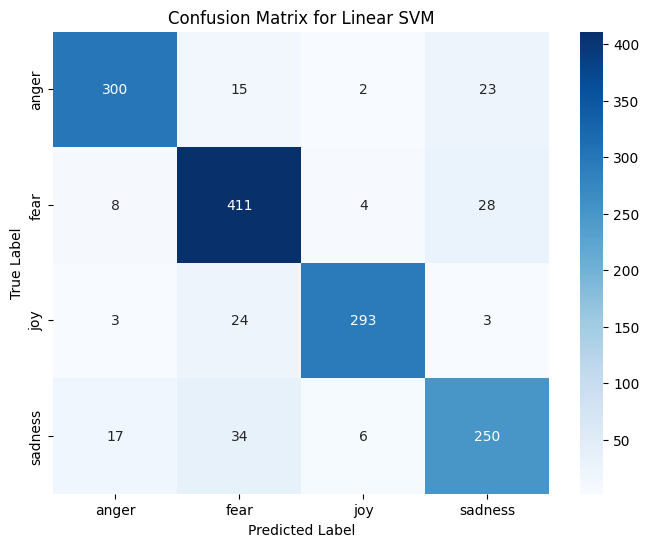

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import time
import matplotlib.pyplot as plt
import seaborn as sns

#Prepare Data for Model
X = df_processed['processed_text']
y = df_processed['sentiment']


#Encode Sentiment Labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
print("\nSentiment Labels Encoded:")
for i, class_label in enumerate(label_encoder.classes_):
    print(f"{class_label} -> {i}")
num_classes = len(label_encoder.classes_)


# Split Data into Training and Testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print(f"\nTraining set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")


# --- TF-IDF Vectorization ---
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

print("\nFitting TF-IDF Vectorizer...")
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print("TF-IDF Vectorization complete.")
print(f"Shape of TF-IDF matrices: Train = {X_train_tfidf.shape}, Test = {X_test_tfidf.shape}")


# --- Define Models ---
models = {
    "Multinomial Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Linear SVM": LinearSVC(random_state=42, dual=False)
}

results = {}

#Train and Evaluate Each Model
for model_name, model in models.items():
    print(f"\n--- Training {model_name} ---")
    start_time = time.time()
    model.fit(X_train_tfidf, y_train)
    training_time = time.time() - start_time
    print(f"Training completed in {training_time:.2f} seconds.")

    print(f"--- Evaluating {model_name} ---")
    start_time = time.time()
    y_pred = model.predict(X_test_tfidf)
    prediction_time = time.time() - start_time
    print(f"Prediction completed in {prediction_time:.2f} seconds.")

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=label_encoder.classes_, zero_division=0)

    results[model_name] = {
        'model': model,
        'accuracy': accuracy,
        'report': report,
        'predictions': y_pred,
        'training_time': training_time,
        'prediction_time': prediction_time
    }

    print(f"\nAccuracy for {model_name}: {accuracy:.4f}")
    print(f"Classification Report for {model_name}:\n{report}")


# --- Compare Model Performance ---
print("\n--- Model Comparison ---")
for name, result in results.items():
    print(f"{name}: Accuracy = {result['accuracy']:.4f}, Train Time = {result['training_time']:.2f}s, Predict Time = {result['prediction_time']:.2f}s")


# --- Choose the Best Model ---
best_model_name = max(results, key=lambda name: results[name]['accuracy'])
best_model = results[best_model_name]['model']
print(f"\nSelected Best Model: {best_model_name} with accuracy {results[best_model_name]['accuracy']:.4f}")


# --- Show Confusion Matrix for the Best Model ---
cm = confusion_matrix(y_test, results[best_model_name]['predictions'])
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title(f'Confusion Matrix for {best_model_name}')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [10]:
import joblib # Library for saving/loading Python objects

#Saving the best model ---
model_filename = 'mental_health_model.joblib'
joblib.dump(best_model, model_filename)
print(f"\nBest model ({best_model_name}) saved to {model_filename}")

#Save the TF-IDF vectorizer ---
vectorizer_filename = 'tfidf_vectorizer.joblib'
joblib.dump(tfidf_vectorizer, vectorizer_filename)
print(f"TF-IDF vectorizer saved to {vectorizer_filename}")

#Save the Label Encoder ---
encoder_filename = 'label_encoder.joblib'
joblib.dump(label_encoder, encoder_filename)
print(f"Label encoder saved to {encoder_filename}")


Best model (Linear SVM) saved to mental_health_model.joblib
TF-IDF vectorizer saved to tfidf_vectorizer.joblib
Label encoder saved to label_encoder.joblib


In [11]:
recommendations = {
    "sadness": {
        "quotes": [
            "Tough times never last, but tough people do. - Robert H. Schuller",
            "The wound is the place where the Light enters you. - Rumi",
            "It's okay not to be okay.",
            "Even the darkest night will end and the sun will rise. - Victor Hugo"
        ],
        "articles": [
            "https://www.healthline.com/health/how-to-stop-being-sad",
            "https://tinybuddha.com/blog/45-simple-self-care-practices-for-a-healthy-mind-body-and-soul/"
        ],
        "spotify_keywords": ["uplifting", "hopeful", "calm acoustic"],
        "youtube_yoga": [
            "Yoga For Sadness - Yoga With Adriene: https://www.youtube.com/watch?v=NUbf3PEuJnA",
            "Gentle Yoga for Beginners - 20 Minute Home Workout: https://www.youtube.com/watch?v=VaoV1PrYft4"
        ],
         "exercise": [
            "Go for a gentle walk outdoors.",
            "Try some light stretching.",
            "Engage in 15 minutes of low-impact cardio like cycling or elliptical."
         ],
         "conversation": [
             "It's understandable to feel sad sometimes. Remember that this feeling is temporary.",
             "Be kind to yourself today. Maybe do something small that usually brings you comfort?",
             "Reaching out to a friend or family member can sometimes help lift your spirits.",
             "Remember your strengths and past challenges you've overcome."
         ]
    },
    "joy": {
         "quotes": [
            "The joy of life comes from our encounters with new experiences. - Christopher McCandless",
            "Find ecstasy in life; the mere sense of living is joy enough. - Emily Dickinson",
            "Spread joy. Chase your wildest dreams."
         ],
         "articles": [
             "https://greatergood.berkeley.edu/article/item/how_to_sustain_happiness",
             "https://www.psychologytoday.com/us/blog/the-right-mindset/202001/5-ways-keep-feeling-good"
         ],
         "spotify_keywords": ["happy", "celebration", "feel good pop"],
         "youtube_yoga": [
             "Joyful Morning Yoga - Yoga With Adriene: https://www.youtube.com/watch?v=bPrau1M1hrQ",
             "Energizing Vinyasa Flow: https://www.youtube.com/watch?v=qkGTOCsO6E0"
         ],
         "exercise": [
            "Keep the energy flowing! Try dancing, jogging, or a fun sport.",
            "Go for a bike ride or a hike.",
            "Celebrate with some energetic activity!"
         ],
         "conversation": [
            "That's wonderful to hear! Embrace this feeling of joy.",
            "What a great day! What contributed to this happiness?",
            "Keep shining! Maybe share this positivity with someone else today?"
         ]
    },
    "anger": {
        "quotes": [
            "For every minute you remain angry, you give up sixty seconds of peace of mind. - Ralph Waldo Emerson",
            "Speak when you are angry and you will make the best speech you will ever regret. - Ambrose Bierce",
            "Anger is an acid that can do more harm to the vessel in which it is stored than to anything on which it is poured."
        ],
        "articles": [
            "https://www.mayoclinic.org/healthy-lifestyle/adult-health/in-depth/anger-management/art-20045434",
            "https://www.healthline.com/health/mental-health/how-to-control-anger"
        ],
        "spotify_keywords": ["calming instrumental", "peaceful piano", "stress relief music"],
        "youtube_yoga": [
            "Yoga To Calm Your Nerves - Yoga With Adriene: https://www.youtube.com/watch?v=qiKJRoX_2pQ",
            "Short Yoga for Anger Release: https://www.youtube.com/watch?v=wkzmg83zP6Y"
        ],
         "exercise": [
            "Channel the energy: Try vigorous exercise like running, boxing (pillow!), or fast-paced walking.",
            "Deep breathing exercises can help calm the nervous system.",
            "Focus on activities that require concentration, like weightlifting or complex stretches."
         ],
         "conversation": [
             "Feeling angry is a valid emotion. Take a few deep breaths.",
             "What triggered this feeling? Sometimes understanding the source helps.",
             "It might help to step away from the situation for a moment to cool down.",
             "Remember to express your anger constructively when you're ready."
         ]
    },
     "fear": {
        "quotes": [
            "Fear is only as deep as the mind allows. - Japanese Proverb",
            "Courage is resistance to fear, mastery of fear – not absence of fear. – Mark Twain",
            "The only thing we have to fear is fear itself. - Franklin D. Roosevelt"
        ],
        "articles": [
            "https://www.verywellmind.com/what-is-fear-2795490",
            "https://www.nhs.uk/mental-health/conditions/phobias/overview/"
        ],
        "spotify_keywords": ["grounding music", "ambient calm", "nature sounds"],
        "youtube_yoga": [
            "Yoga For Anxiety and Fear - Yoga With Adriene: https://www.youtube.com/watch?v=bJJWArRfKa0",
            "Grounding Yoga Practice: https://www.youtube.com/watch?v=8-4_fZL-dO4"
        ],
         "exercise": [
            "Gentle, grounding movements like Tai Chi or slow walking.",
            "Focus on your breath during any physical activity.",
            "Comforting stretches in a safe space."
         ],
         "conversation": [
             "It's okay to feel afraid. Your feelings are valid.",
             "Take slow, deep breaths. Focus on your surroundings right now.",
             "What is one small thing you can control in this moment?",
             "Remember that you are safe right now."
         ]
    },
     "neutral": {
         "quotes": [
            "Observe calmly; secure your position; cope with affairs calmly. - Zhuge Liang",
            "Mindfulness means paying attention in a particular way: on purpose, in the present moment, and nonjudgmentally. - Jon Kabat-Zinn"
         ],
         "articles": [
             "https://www.mindful.org/what-is-mindfulness/",
             "https://positivepsychology.com/benefits-of-journaling/"
         ],
         "spotify_keywords": ["focus beats", "lo-fi hip hop", "chill instrumental"],
         "youtube_yoga": [
             "Mindful Movement Yoga: https://www.youtube.com/watch?v=4KgK_m-eN4E",
             "Simple Seated Meditation: https://www.youtube.com/watch?v=ZSkJgBgIk8o"
         ],
         "exercise": [
            "Maintain balance with moderate activity like walking or cycling.",
            "Try a mindful movement practice.",
            "Continue your regular exercise routine."
         ],
         "conversation": [
            "Sometimes a neutral state is a good place for reflection.",
            "How are you feeling overall today?",
            "This could be a good time to check in with yourself or plan your day.",
         ]
    },


     "default": {
         "quotes": ["Be kind to yourself today.", "Every day is a fresh start."],
         "articles": ["https://www.mentalhealth.gov/"],
         "spotify_keywords": ["calm", "ambient"],
         "youtube_yoga": ["Gentle Yoga for Beginners - 20 Minute Home Workout: https://www.youtube.com/watch?v=VaoV1PrYft4"],
         "exercise": ["Try some light stretching or a short walk."],
         "conversation": ["Remember to take care of yourself. How can I help further?"]
     }
}


for i, emotion_label in enumerate(label_encoder.classes_):
    if emotion_label not in recommendations:
        print(f"Warning: Emotion '{emotion_label}' (encoded as {i}) not found in recommendations dictionary. Using default.")


print("\nRecommendation resources defined.")

# I could include a spotify recommendation here

import random

def get_recommendations(emotion_label):
    """Fetches recommendations based on the detected emotion label."""
    recs = recommendations.get(emotion_label, recommendations['default']) # Use .get() for safety

    print(f"\nOkay, it sounds like you might be feeling {emotion_label}.")
    print("Here are a few things that might help:")

    # Quote
    print(f"\n*   Motivational Quote: '{random.choice(recs['quotes'])}'")

    # Article
    if recs['articles']:
        print(f"*   Helpful Article: {random.choice(recs['articles'])}")

    # Yoga/Exercise
    if recs.get('youtube_yoga'): # Use .get() in case key missing
        print(f"*   Yoga/Relaxation: {random.choice(recs['youtube_yoga'])}")
    if recs.get('exercise'):
        print(f"*   Exercise Idea: {random.choice(recs['exercise'])}")

    # Supportive Conversation Snippet
    if recs.get('conversation'):
         print(f"\n{random.choice(recs['conversation'])}")


Recommendation resources defined.


In [12]:
import joblib
import random

#Load the saved components ---
try:
    loaded_model = joblib.load('mental_health_model.joblib')
    loaded_vectorizer = joblib.load('tfidf_vectorizer.joblib')
    loaded_encoder = joblib.load('label_encoder.joblib')
    print("\nModel, Vectorizer, and Encoder loaded successfully!")


    if 'recommendations' not in globals():
         print("Error: Recommendations dictionary not found. Please define it.")
         # Define or load recommendations here
    if 'preprocess_text' not in globals():
         print("Error: preprocess_text function not found. Please define it.")
         # Define or load preprocess_text here

except FileNotFoundError:
    print("\nError: Could not load model/vectorizer/encoder files.")
    print("Please ensure 'mental_health_model.joblib', 'tfidf_vectorizer.joblib', and 'label_encoder.joblib' are in the correct folder.")
    # Set variables to None to prevent errors later if loading failed
    loaded_model, loaded_vectorizer, loaded_encoder = None, None, None
except Exception as e:
     print(f"\nAn error occurred loading files: {e}")
     loaded_model, loaded_vectorizer, loaded_encoder = None, None, None


#Main Interaction Function ---
def mental_health_chat():
    if not all([loaded_model, loaded_vectorizer, loaded_encoder]):
        print("\nCannot start the chat as essential components failed to load.")
        return

    print("\n-------------------------------------")
    print(" Mental Health Wellness AI (Beta) ")
    print("-------------------------------------")
    print("Hi there! How are you feeling today? Please write a sentence or two about your current state of mind.")
    print("Type 'quit' to exit.")

    while True:
        user_input = input("\nYour thoughts: ")
        if user_input.lower() == 'quit':
            print("\nThank you for sharing. Remember to take care of yourself. Goodbye!")
            break

        if not user_input.strip():
            print("Please write something about how you are feeling.")
            continue

        # 1. Preprocess the user input
        processed_input = preprocess_text(user_input) # Use the same function as training

        # 2. Vectorize the preprocessed input
        input_vector = loaded_vectorizer.transform([processed_input]) # Use transform, not fit_transform!

        # 3. Predict the emotion
        predicted_encoded_label = loaded_model.predict(input_vector)[0] # Predict returns an array

        # 4. Decode the label back to text
        predicted_emotion_label = loaded_encoder.inverse_transform([predicted_encoded_label])[0]

        # 5. Get and display recommendations
        get_recommendations(predicted_emotion_label) # Use the function defined earlier

        print("\nFeel free to share more, or type 'quit' to exit.")

# --- Start the chat ---
# Run this only when you want to start the interactive part
mental_health_chat()


Model, Vectorizer, and Encoder loaded successfully!

-------------------------------------
 Mental Health Wellness AI (Beta) 
-------------------------------------
Hi there! How are you feeling today? Please write a sentence or two about your current state of mind.
Type 'quit' to exit.

Your thoughts: i am feeling very jouful

Okay, it sounds like you might be feeling sadness.
Here are a few things that might help:

*   Motivational Quote: 'Even the darkest night will end and the sun will rise. - Victor Hugo'
*   Helpful Article: https://tinybuddha.com/blog/45-simple-self-care-practices-for-a-healthy-mind-body-and-soul/
*   Yoga/Relaxation: Yoga For Sadness - Yoga With Adriene: https://www.youtube.com/watch?v=NUbf3PEuJnA
*   Exercise Idea: Go for a gentle walk outdoors.

Remember your strengths and past challenges you've overcome.

Feel free to share more, or type 'quit' to exit.

Your thoughts: quit

Thank you for sharing. Remember to take care of yourself. Goodbye!
